<a href="https://colab.research.google.com/github/rudra1127/Deep-learning-/blob/main/Backpropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Back propagation

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()
#df.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [7]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Exited'])
y=df['Exited']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [14]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7679 - loss: 0.5484 - val_accuracy: 0.7987 - val_loss: 0.4644
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4674 - val_accuracy: 0.8106 - val_loss: 0.4405
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8189 - loss: 0.4352 - val_accuracy: 0.8138 - val_loss: 0.4263
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.4134 - val_accuracy: 0.8244 - val_loss: 0.4121
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.4056 - val_accuracy: 0.8306 - val_loss: 0.4012
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 0.3989 - val_accuracy: 0.8344 - val_loss: 0.3895
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - loss: 0.3715 - val_accuracy: 0.8456 - val_loss: 0.3781
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0.3693 - val_accu

In [25]:
model.layers[1].get_weights()

[array([[ 0.5571118 ,  0.55282027, -0.04432894, -0.21975364,  0.3004419 ,
          0.54170746,  0.5041032 , -0.66857535,  0.02723903,  0.34759158,
          0.49183893],
        [ 0.43881005, -0.59830767, -0.4668238 ,  0.14779206,  0.3242671 ,
          0.08091977,  0.4221131 ,  0.3135619 ,  0.39830303,  0.578076  ,
         -0.7968854 ],
        [-0.33138886, -0.2313801 , -0.11057939,  0.12840512,  0.24756503,
         -0.27473813, -0.39402932,  0.8144337 ,  0.08736258, -0.1168295 ,
         -0.59443843],
        [ 0.5200432 , -0.64725465,  0.37591377,  0.45653713,  0.24975422,
          0.22518948, -0.0926505 , -0.51823145,  0.24165246,  0.22408132,
         -0.56965667],
        [ 0.6036076 ,  0.6255636 , -0.02269038, -0.48062176, -0.2067891 ,
         -0.48043668,  0.97521776,  0.25495374, -0.52470624,  0.11592077,
          0.16718857],
        [ 0.33903283, -0.20243673,  0.6002825 , -0.08435296,  0.39666635,
          0.1591353 , -0.09707583, -0.35636172,  0.1054005 , -0.3219710

In [26]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [27]:
y_pred=np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8635

In [29]:
import matplotlib.pyplot as plt

In [30]:
history.history

{'accuracy': [0.7920312285423279,
  0.8031250238418579,
  0.8207812309265137,
  0.8265625238418579,
  0.8321874737739563,
  0.8403124809265137,
  0.8446875214576721,
  0.8509374856948853,
  0.8542187213897705,
  0.8592187762260437,
  0.858593761920929,
  0.8606250286102295,
  0.8626562356948853,
  0.8612499833106995,
  0.8615624904632568,
  0.8621875047683716,
  0.8621875047683716,
  0.8623437285423279,
  0.8617187738418579,
  0.8609374761581421,
  0.8617187738418579,
  0.8623437285423279,
  0.8635937571525574,
  0.8629687428474426,
  0.86328125,
  0.8635937571525574,
  0.8635937571525574,
  0.8648437261581421,
  0.86328125,
  0.8621875047683716,
  0.8637499809265137,
  0.8631250262260437,
  0.8645312786102295,
  0.8656250238418579,
  0.8639062643051147,
  0.8651562333106995,
  0.8635937571525574,
  0.8668749928474426,
  0.8634374737739563,
  0.8651562333106995,
  0.8676562309265137,
  0.8662499785423279,
  0.8650000095367432,
  0.8656250238418579,
  0.8654687404632568,
  0.86500000953

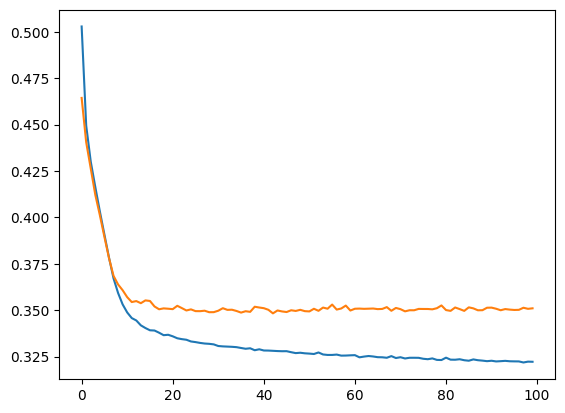

In [31]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')

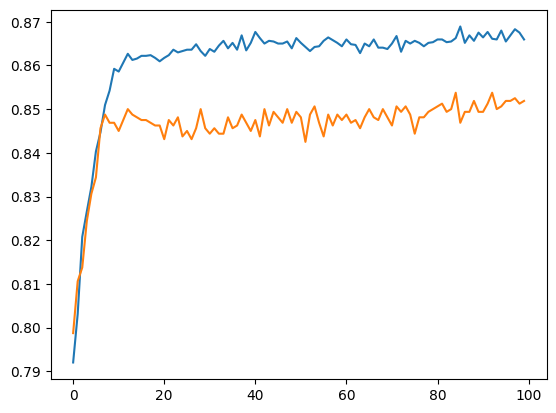

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])